### CNN part:(1) Download a tinyImageNet dataset
https://paperswithcode.com/dataset/tiny-imagenet

In [ ]:
from keras.applications.vgg19 import VGG19
model = VGG19()


Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

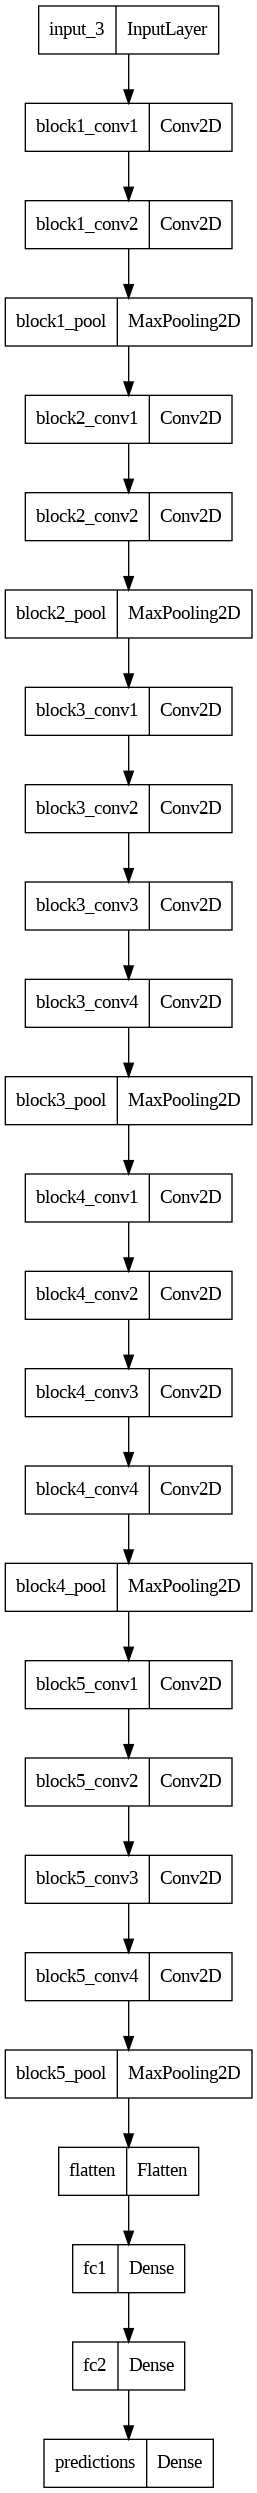

In [ ]:
from keras.utils import plot_model

print(model.summary())
plot_model(model, to_file='vgg.png')

In [ ]:
!unzip /content/tiny-imagenet-200.zip

Streaming output truncated to the last 5000 lines.
  inflating: tiny-imagenet-200/val/images/val_3979.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3963.JPEG  
  inflating: tiny-imagenet-200/val/images/val_7199.JPEG  
  inflating: tiny-imagenet-200/val/images/val_2752.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9687.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9407.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3603.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3412.JPEG  
  inflating: tiny-imagenet-200/val/images/val_6982.JPEG  
  inflating: tiny-imagenet-200/val/images/val_8496.JPEG  
  inflating: tiny-imagenet-200/val/images/val_7332.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9241.JPEG  
  inflating: tiny-imagenet-200/val/images/val_4196.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5980.JPEG  
  inflating: tiny-imagenet-200/val/images/val_6697.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9969.JPEG  
  inflating: tiny-ima

### (2) Use a small and large version of existing image classification models, i.e. pre-trained models, including VGG-19, ResNet50V2, and Inceptionv4. Then, run them on the tinyImageNet.
###(3) Experiment classification with all these pre-trained models, on the tinyImageNet dataset, and report their accuracy.
### 4) Write a short report and compare the results together. In your report, you need to state why a model is performing better than another model.

In [ ]:
import numpy as np
from keras.applications.vgg16 import VGG16, decode_predictions, preprocess_input as vgg16_preprocess_input
from keras.applications.vgg19 import VGG19, preprocess_input as vgg19_preprocess_input
from tensorflow.keras.preprocessing import image


# Load the pre-trained models
model_vgg16 = VGG16(weights='imagenet', include_top=True)
model_vgg19 = VGG19(weights='imagenet', include_top=True)

# Define the paths to the validation data and the corresponding label mapping file
val_data_dir = '/content/tiny-imagenet-200/val/'
val_label_file = '/content/tiny-imagenet-200/val/val_annotations.txt'

# Load the mapping of validation images to their corresponding labels
val_labels = {}
with open(val_label_file, 'r') as f:
    for line in f.readlines():
        parts = line.strip().split('\t')
        val_labels[parts[0]] = parts[1]

# Loop over the validation images and predict their classes using the pre-trained models
vgg16_correct = 0
vgg19_correct = 0
total = 0
n = 500
for i in range(500):
    # Define the path to the validation image
    val_image_path = f"{val_data_dir}images/val_{str(i)}.JPEG"

    # Load the image and preprocess it
    img = image.load_img(val_image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Predict the class of the image using VGG-16
    x_vgg16 = vgg16_preprocess_input(x.copy())
    preds_vgg16 = model_vgg16.predict(x_vgg16)
    class_idx_vgg16 = np.argmax(preds_vgg16[0])
    class_name_vgg16 = decode_predictions(preds_vgg16, top=1)[0][0][0]

    # Predict the class of the image using VGG-19
    x_vgg19 = vgg19_preprocess_input(x.copy())
    preds_vgg19 = model_vgg19.predict(x_vgg19)
    class_idx_vgg19 = np.argmax(preds_vgg19[0])
    class_name_vgg19 = decode_predictions(preds_vgg19, top=1)[0][0][0]

    # Get the ground truth label name
    true_label = val_labels[f'val_{str(i)}.JPEG']

    # Convert the predicted label to ImageNet format
    print(class_name_vgg16, true_label)
    class_name_vgg16_imagenet = class_name_vgg16.split('_')[0]
    class_name_vgg19_imagenet = class_name_vgg19.split('_')[0]

    # Check if the predicted class matches the ground truth label in ImageNet format
    if true_label == class_name_vgg16_imagenet:
        vgg16_correct += 1
    if true_label == class_name_vgg19_imagenet:
        vgg19_correct += 1
print("acc VGG 16", vgg16_correct/ 500)
print("acc VGG 19", vgg19_correct/ 500)

1/1 [==============================] - 2s 2s/step
n03095699 n03444034
1/1 [==============================] - 1s 745ms/step
n04523525 n04067472
1/1 [==============================] - 1s 749ms/step
n04590129 n04070727
1/1 [==============================] - 1s 759ms/step
n03160309 n02808440
1/1 [==============================] - 1s 765ms/step
n04149813 n02808440
1/1 [==============================] - 1s 765ms/step
n04548280 n04399382
1/1 [==============================] - 1s 758ms/step
n03095699 n04179913
1/1 [==============================] - 1s 781ms/step
n02823428 n02823428
1/1 [==============================] - 1s 1s/step
n03095699 n04146614
1/1 [==============================] - 1s 1s/step
n03095699 n02226429
1/1 [==============================] - 1s 750ms/step
n03344393 n04371430
1/1 [==============================] - 1s 789ms/step
n09332890 n07753592
1/1 [==============================] - 1s 754ms/step
n04589890 n02226429
1/1 [==============================] - 1s 744ms/step
n026994

In [ ]:
import numpy as np
from keras.applications.resnet import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input
from tensorflow.keras.preprocessing import image


# Load the pre-trained models
model_resnet50 = ResNet50(weights='imagenet', include_top=True)
model_resnet50v2 = ResNet50V2(weights='imagenet', include_top=True)

# Define the paths to the validation data and the corresponding label mapping file
val_data_dir = '/content/tiny-imagenet-200/val/'
val_label_file = '/content/tiny-imagenet-200/val/val_annotations.txt'

# Load the mapping of validation images to their corresponding labels
val_labels = {}
with open(val_label_file, 'r') as f:
    for line in f.readlines():
        parts = line.strip().split('\t')
        val_labels[parts[0]] = parts[1]

# Initialize the counters for correct predictions and total predictions
correct_resnet50 = 0
correct_resnet50v2 = 0
total = 0

# Loop over the validation images and predict their classes using the pre-trained models
for i in range(500):
    # Define the path to the validation image
    val_image_path = f"{val_data_dir}images/val_{str(i)}.JPEG"

    # Load the image and preprocess it
    img = image.load_img(val_image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Predict the class of the image using ResNet50
    preds_resnet50 = model_resnet50.predict(x)
    class_idx_resnet50 = np.argmax(preds_resnet50[0])
    class_name_resnet50 = decode_predictions(preds_resnet50, top=1)[0][0][0]

    # Predict the class of the image using ResNet50V2
    preds_resnet50v2 = model_resnet50v2.predict(x)
    class_idx_resnet50v2 = np.argmax(preds_resnet50v2[0])
    class_name_resnet50v2 = decode_predictions(preds_resnet50v2, top=1)[0][0][0]

    # Check if the predicted class using ResNet50 is correct
    print("DJajhhajdf", val_labels[f'val_{str(i)}.JPEG'], class_name_resnet50)
    if val_labels[f'val_{str(i)}.JPEG'] == class_name_resnet50:
        correct_resnet50 += 1

    # Check if the predicted class using ResNet50V2 is correct
    if val_labels[f'val_{str(i)}.JPEG'] == class_name_resnet50v2:
        correct_resnet50v2 += 1

    # Increment the total counter
    total += 1

    # Print the predicted class and the true class
print(f"Image {i+1}")
print(f"True class: {val_labels[f'val_{str(i)}.JPEG']}")
print(f"ResNet50 predicted class index: {class_idx_resnet50}")
print(f"ResNet50 predicted class name: {class_name_resnet50}")
print("Accuracy of ResNet50", correct_resnet50/500)
print("\nResNet50V2 predicted class index: {class_idx_resnet50v2}")
print(f"ResNet50V2 predicted class name: {class_name_resnet50v2}")
print("Accuracy of ResNet50V2", correct_resnet50v2/500)


1/1 [==============================] - 1s 1s/step
DJajhhajdf n03444034 n01930112
1/1 [==============================] - 0s 187ms/step
DJajhhajdf n04067472 n01930112
1/1 [==============================] - 0s 198ms/step
DJajhhajdf n04070727 n01930112
1/1 [==============================] - 0s 190ms/step
DJajhhajdf n02808440 n01930112
1/1 [==============================] - 0s 191ms/step
DJajhhajdf n02808440 n01930112
1/1 [==============================] - 0s 190ms/step
DJajhhajdf n04399382 n01930112
1/1 [==============================] - 0s 182ms/step
DJajhhajdf n04179913 n01930112
1/1 [==============================] - 0s 188ms/step
DJajhhajdf n02823428 n01930112
1/1 [==============================] - 0s 192ms/step
DJajhhajdf n04146614 n01930112
1/1 [==============================] - 0s 189ms/step
DJajhhajdf n02226429 n01930112
1/1 [==============================] - 0s 322ms/step
DJajhhajdf n04371430 n01930112
1/1 [==============================] - 0s 325ms/step
DJajhhajdf n07753592 n0193

In [ ]:
import numpy as np
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
# from keras.applications.inception_v4 import InceptionV4, preprocess_input
from tensorflow.keras.preprocessing import image


# Load the pre-trained models
model_inceptionv3 = InceptionV3(weights='imagenet', include_top=True)
# model_inceptionv4 = InceptionV4(weights='imagenet', include_top=True)

# Define the paths to the validation data and the corresponding label mapping file
val_data_dir = '/content/tiny-imagenet-200/val/'
val_label_file = '/content/tiny-imagenet-200/val/val_annotations.txt'

# Load the mapping of validation images to their corresponding labels
val_labels = {}
with open(val_label_file, 'r') as f:
    for line in f.readlines():
        parts = line.strip().split('\t')
        val_labels[parts[0]] = parts[1]

# Initialize the counters for correct predictions and total predictions
correct_inceptionv3 = 0
correct_inceptionv4 = 0
total = 0

# Loop over the validation images and predict their classes using the pre-trained models
for i in range(500):
    # Define the path to the validation image
    val_image_path = f"{val_data_dir}images/val_{str(i)}.JPEG"

    # Load the image and preprocess it
    img = image.load_img(val_image_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Predict the class of the image using InceptionV3
    preds_inceptionv3 = model_inceptionv3.predict(x)
    class_idx_inceptionv3 = np.argmax(preds_inceptionv3[0])
    class_name_inceptionv3 = decode_predictions(preds_inceptionv3, top=1)[0][0][0]

    # # Predict the class of the image using InceptionV4
    # preds_inceptionv4 = model_inceptionv4.predict(x)
    # class_idx_inceptionv4 = np.argmax(preds_inceptionv4[0])
    # class_name_inceptionv4 = decode_predictions(preds_inceptionv4, top=1)[0][0][0]

    # Check if the predicted class using InceptionV3 is correct
    if val_labels[f'val_{str(i)}.JPEG'] == class_name_inceptionv3:
        correct_inceptionv3 += 1

    # # Check if the predicted class using InceptionV4 is correct
    # if val_labels[f'val_{str(i)}.JPEG'] == class_name_inceptionv4:
    #     correct_inceptionv4 += 1

    # Increment the total counter
    total += 1

    # Print the predicted class and the true class
print(f"Image {i+1}")
print(f"True class: {val_labels[f'val_{str(i)}.JPEG']}")
print(f"InceptionV3 predicted class index: {class_idx_inceptionv3}")
print(f"InceptionV3 predicted class name: {class_name_inceptionv3}")
print(f"Accuracy of InceptionV3: {correct_inceptionv3/total}")
    # print(f"InceptionV4 predicted class index: {class_idx_inceptionv4}")
    # print(f"InceptionV4 predicted class name: {class_name_inceptionv4}")
    # print(f"Accuracy of InceptionV4: {correct_inceptionv4/total}")


1/1 [==============================] - 0s 456ms/step
Image 500
True class: n04560804
InceptionV3 predicted class index: 653
InceptionV3 predicted class name: n03764736
Accuracy of InceptionV3: 0.386


#PART 2
####(1) Use a synthetic time series generator (e.g. https://github.com/NikeInc/timeseries-generator or) and generate time series that has some patterns.
####(2) Experiment prediction on the time series with LSTM, GRU, BiDirectional RNN and Deep RNN.

In [ ]:

!pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 17.2 MB/s eta 0:00:00


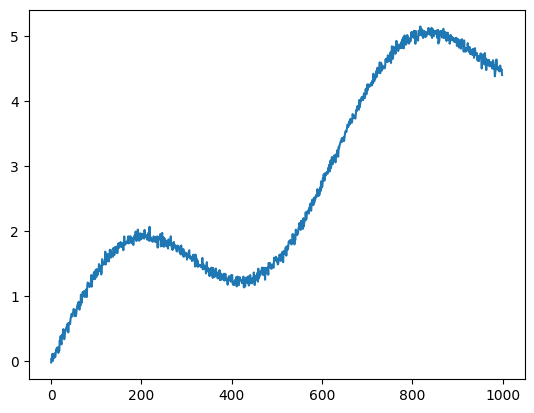

In [ ]:
import numpy as np

def generate_synthetic_time_series(n_samples, trend, seasonality, noise):
  """Generates a synthetic time series with the given trend, seasonality, and noise.

  Args:
    n_samples: The number of samples in the time series.
    trend: The trend of the time series.
    seasonality: The seasonality of the time series.
    noise: The noise level of the time series.

  Returns:
    The generated time series.
  """

  # Generate the trend.
  trend_values = np.arange(n_samples) * trend

  # Generate the seasonal component.
  seasonal_values = np.sin(np.arange(n_samples) * seasonality)

  # Generate the noise.
  noise_values = np.random.normal(0, noise, n_samples)

  # Combine the trend, seasonal component, and noise to generate the time series.
  time_series = trend_values + seasonal_values + noise_values

  return time_series

if __name__ == "__main__":

  # Generate a synthetic time series with an upward trend, a seasonal pattern, and some noise.
  n_samples = 1000
  trend = 0.005
  seasonality = 0.01
  noise = 0.05

  time_series = generate_synthetic_time_series(n_samples, trend, seasonality, noise)
  # Plot the time series.
  plt.plot(time_series)
  plt.show()

In [ ]:
import numpy as np
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, GRU, Bidirectional, Dense

# Generate a sinusoidal time series
t = np.arange(0, 10000, 0.1)
y = np.sin(t)
# y += np.random.normal(0, 0.1, size=y.shape)


# Split the time series into training and test sets
train_size = int(len(y) * 0.8)
train_t, test_t = t[:train_size], t[train_size:]
train_y, test_y = y[:train_size], y[train_size:]

# Function to prepare the data for training the models
def prepare_data(timeseries, n_input, n_output):
    timeseries = np.array(timeseries).reshape(-1, 1)
    generator = TimeseriesGenerator(timeseries, timeseries, length=n_input, batch_size=1)
    x = np.array([generator[i][0] for i in range(len(generator))])
    y = np.array([generator[i][1] for i in range(len(generator))])
    x = x.reshape((x.shape[0], n_input, 1))
    return x, y

# Set the number of time steps for the input/output sequences
n_input = 10
n_output = 1

# Prepare the training and test sets
train_x, train_y = prepare_data(train_y, n_input, n_output)
test_x, test_y = prepare_data(test_y, n_input, n_output)

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(n_input, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
lstm_model.fit(train_x, train_y, epochs=5, verbose=0)

# Evaluate the LSTM model
lstm_score = lstm_model.evaluate(test_x, test_y, verbose=0)
print('LSTM Test Score:', lstm_score)

# Define the GRU model
gru_model = Sequential()
gru_model.add(GRU(50, activation='relu', input_shape=(n_input, 1)))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mse')

# Train the GRU model
gru_model.fit(train_x, train_y, epochs=5, verbose=0)

# Evaluate the GRU model
gru_score = gru_model.evaluate(test_x, test_y, verbose=0)
print('GRU Test Score:', gru_score)

# Define the BiDirectional RNN model
bidir_model = Sequential()
bidir_model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_input, 1)))
bidir_model.add(Dense(1))
bidir_model.compile(optimizer='adam', loss='mse')

# Train the BiDirectional RNN model
bidir_model.fit(train_x, train_y, epochs=5, verbose=0)

# Evaluate the BiDirectional RNN model
bidir_score = bidir_model.evaluate(test_x, test_y, verbose=0)
print('BiDirectional RNN Test Score:', bidir_score)

# Define the Deep RNN model
deep_model = Sequential()
deep_model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_input, 1)))
deep_model.add(LSTM(50, activation='relu'))
deep_model.add(Dense(1))
deep_model.compile(optimizer='adam', loss='mse')

# Train the Deep RNN model
deep_model.fit(train_x, train_y, epochs=5, verbose=0)

# Evaluate the Deep RNN model
deep_score = deep_model.evaluate(test_x, test_y, verbose=0)
print('Deep RNN Test Score:', deep_score)


LSTM Test Score: 1.5142522897804156e-05
GRU Test Score: 2.1300866137607954e-06
BiDirectional RNN Test Score: 1.142015321420331e-06
Deep RNN Test Score: 3.6773963074665517e-07


### (3) Increase the size of the time series three times, and perform the experiments in step 2, again three times.
(4) Write a short report and compare the result of algorithms and different dataset sizes together. By different datasets, we mean the first time series and the one that has a size of three-time larger.

In [ ]:
import numpy as np
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, GRU, Bidirectional, Dense

# Generate a sinusoidal time series
t = np.arange(0, 30000, 0.1)
y = np.sin(t)
# y += np.random.normal(0, 0.1, size=y.shape)


# Split the time series into training and test sets
train_size = int(len(y) * 0.8)
train_t, test_t = t[:train_size], t[train_size:]
train_y, test_y = y[:train_size], y[train_size:]

# Function to prepare the data for training the models
def prepare_data(timeseries, n_input, n_output):
    timeseries = np.array(timeseries).reshape(-1, 1)
    generator = TimeseriesGenerator(timeseries, timeseries, length=n_input, batch_size=1)
    x = np.array([generator[i][0] for i in range(len(generator))])
    y = np.array([generator[i][1] for i in range(len(generator))])
    x = x.reshape((x.shape[0], n_input, 1))
    return x, y

# Set the number of time steps for the input/output sequences
n_input = 10
n_output = 1

# Prepare the training and test sets
train_x, train_y = prepare_data(train_y, n_input, n_output)
test_x, test_y = prepare_data(test_y, n_input, n_output)

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(n_input, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
lstm_model.fit(train_x, train_y, epochs=5, verbose=0)

# Evaluate the LSTM model
lstm_score = lstm_model.evaluate(test_x, test_y, verbose=0)
print('LSTM Test Score:', lstm_score)

# Define the GRU model
gru_model = Sequential()
gru_model.add(GRU(50, activation='relu', input_shape=(n_input, 1)))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mse')

# Train the GRU model
gru_model.fit(train_x, train_y, epochs=5, verbose=0)

# Evaluate the GRU model
gru_score = gru_model.evaluate(test_x, test_y, verbose=0)
print('GRU Test Score:', gru_score)

# Define the BiDirectional RNN model
bidir_model = Sequential()
bidir_model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_input, 1)))
bidir_model.add(Dense(1))
bidir_model.compile(optimizer='adam', loss='mse')

# Train the BiDirectional RNN model
bidir_model.fit(train_x, train_y, epochs=5, verbose=0)

# Evaluate the BiDirectional RNN model
bidir_score = bidir_model.evaluate(test_x, test_y, verbose=0)
print('BiDirectional RNN Test Score:', bidir_score)

# Define the Deep RNN model
deep_model = Sequential()
deep_model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_input, 1)))
deep_model.add(LSTM(50, activation='relu'))
deep_model.add(Dense(1))
deep_model.compile(optimizer='adam', loss='mse')

# Train the Deep RNN model
deep_model.fit(train_x, train_y, epochs=5, verbose=0)

# Evaluate the Deep RNN model
deep_score = deep_model.evaluate(test_x, test_y, verbose=0)
print('Deep RNN Test Score:', deep_score)


LSTM Test Score: 1.1716066694589244e-07
GRU Test Score: 2.083264735119883e-05
BiDirectional RNN Test Score: 1.9133284467898193e-07
Deep RNN Test Score: 3.05589864524336e-08
